<a href="https://colab.research.google.com/github/Pengs555/Digital-Signal-Processing/blob/main/Jobsheet_2__PSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Oleh  : Faiq Mananul Faqih / 5312422006**

**Windows**

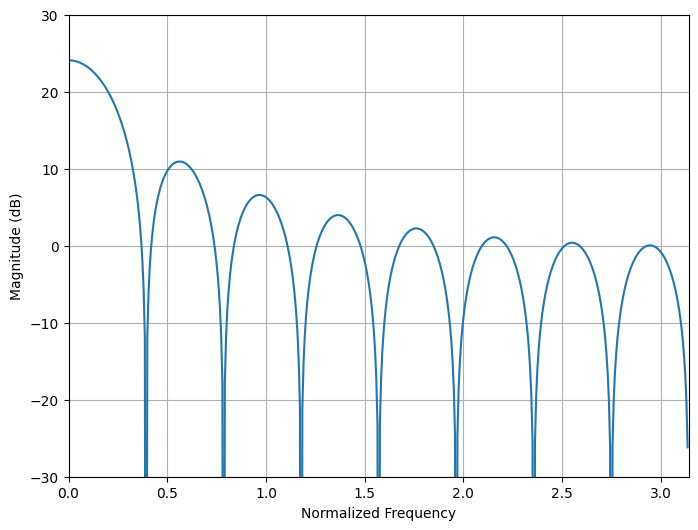

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h = np.ones(16);
omega, H = signal.freqz(h)
plt.figure(figsize=(8,6))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

Gambar menunjukkan plot frekuensi yang dinormalisasi dengan magnitude dalam desibel (dB). Plot menunjukkan  pola pada grafik dalam merepresentasikan respons frekuensi dari filter FIR. Puncak dan lembah yang terlihat menunjukkan bagaimana sistem atau filter merespons pada berbagai frekuensi, di mana puncak tertinggi menunjukkan respon sistem memperkuat sinyal dengan maksimal, dan lembah menunjukkan titik di mana ada peredaman.

In [2]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
  numfreqsamples = 512

  #desired passband
  pb = int(numfreqsamples/4.0)
  #desired transition band:
  tb=int(numfreqsamples/8.0)

  w, H = signal.freqz(h,1,numfreqsamples)
  H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
  weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
  err = np.sum(np.abs(H-H_desired)*weights)
  return err

Kode di atas digunakan untuk menghitung kesalahan (error) dalam desain filter digital. Fungsi ini menerima sebuah array "h" yang merupakan koefisien filter FIR (Finite Impulse Response) dan mengembalikan nilai kesalahan berdasarkan seberapa baik respon frekuensi filter tersebut memenuhi spesifikasi yang diinginkan. Tujuan dibuatnya untuk mengoptimalkan koefisien filter "h" sehingga menghasilkan respon frekuensi yang mendekati ideal atau yang memenuhi kriteria tertentu dengan error seminimal mungkin.

**View H Desired and Weights**

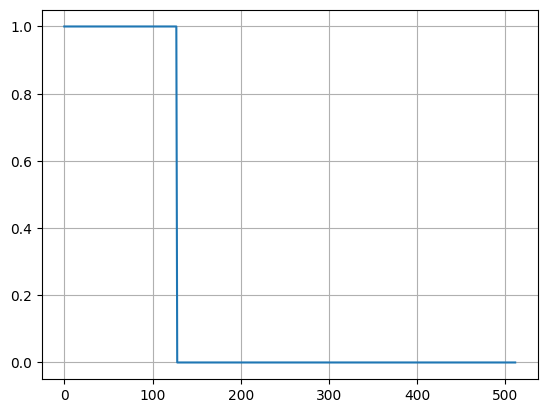

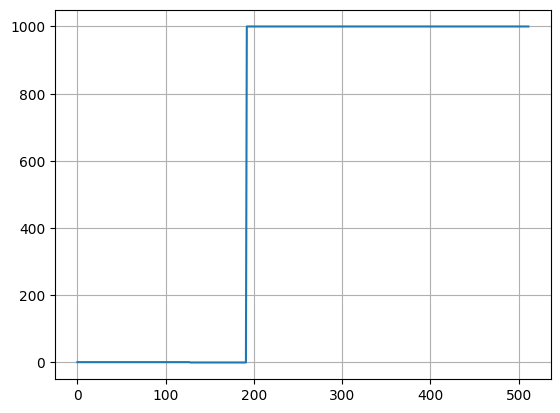

In [3]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512

#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

Menjelaskan terkait filter digital yaitu respon frekuensi yang diinginkan (desired) dan pembobotan kesalahan (error weighting).
* Plot Pertama Memberikan visual yang jelas tentang seberapa jauh frekuensi dibiarkan lolos tanpa redaman (passband) dan di mana filter diharapkan mulai meredam sinyal (stopband). Respon ini ideal untuk filter low-pass dimana tujuannya untuk membiarkan frekuensi rendah lolos dan menghentikan frekuensi lebih tinggi.
* Plot Kedua Menunjukkan bagaimana kesalahan di setiap bagian spektrum diperhitungkan dalam proses optimisasi filter. Bobot tinggi di stopband mengindikasikan pentingnya keakuratan dalam meredam frekuensi yang tidak diinginkan.

In [4]:
import scipy.optimize as opt

minout = opt.minimize(errfunc, np.random.rand(16))
h = minout.x
print(h)

[-0.00042589 -0.00224633 -0.00696352 -0.01589299 -0.02904792 -0.0444952
 -0.05846657 -0.06683571 -0.066824   -0.05841759 -0.04444428 -0.02904616
 -0.01593828 -0.00703631 -0.002277   -0.0004196 ]


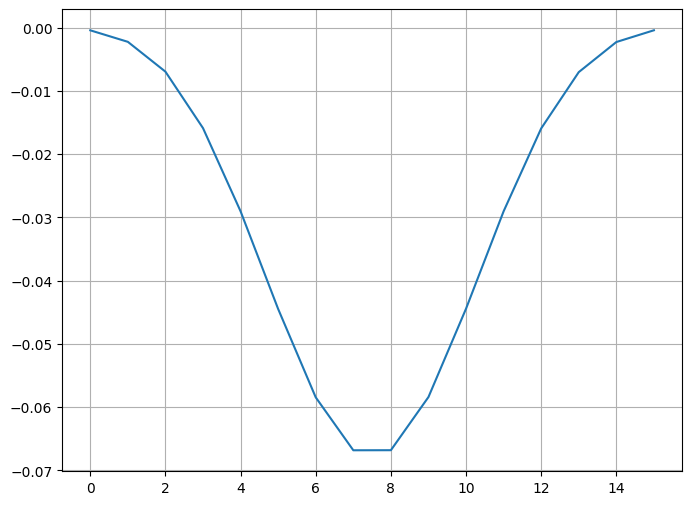

In [5]:
plt.figure(figsize=(8,6))
plt.plot(h)
plt.grid()

Penggunaan fungsi "errfunc" untuk desain filter FIRdengan menggunakan optimasi. Fungsi "minimize" diaplikasikan untuk menemukan nilai minimum dari "errfunc". Argumen pertama adalah fungsi objektif (errfunc), yang menghitung kesalahan antara respon frekuensi aktual dari filter dan respon yang diinginkan berdasarkan spesifikasi yang telah ditetapkan. Argumen kedua adalah nilai awal dari koefisien filter "h", yang diinisialisasi secara acak dengan "np.random.rand(16)". Ini berarti bahwa filter yang dirancang akan memiliki 16 koefisien. Berdasar dari optimasi didapatkan 16 koefisien hasil kemudian dilakukan plot.

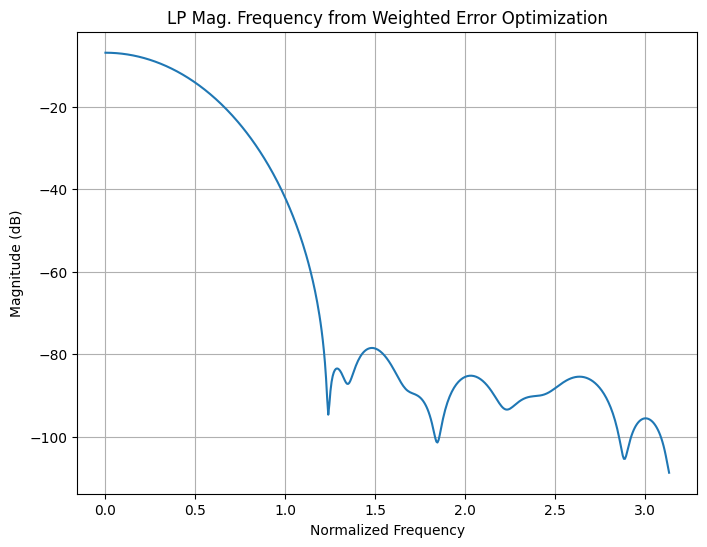

In [6]:
omega, H = signal.freqz(h)
plt.figure(figsize=(8,6))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency from Weighted Error Optimization')
plt.grid()

Perhitungan dan plot (visualisasi) respon domain frekuensi dari filter FIR yang koefisiennya telah di optimasi. plt.plot(omega, 20*np.log10(abs(H)+1e-6)): Memplot respon frekuensi dalam desibel (dB). Fungsi "log10" digunakan untuk mengonversi amplitudo menjadi dB. Nilai "abs(H)" adalah magnitudo dari respon frekuensi, dan penambahan "1e-6" bertujuan untuk menghindari logaritma dari nol yang akan menyebabkan masalah matematika (log(0) tidak terdefinisi). Plot yang dihasilkan memberikan visualisasi dari efektivitas dan karakteristik frekuensi filter yang telah dioptimasi. Dengan melihat grafik dapat dinilai seberapa baik filter memenuhi spesifikasi desain, terutama dalam hal mempertahankan amplitudo di passband dan meredam amplitudo di stopband.

**Raise Cosine Window (Hann- or Hanning Window)**

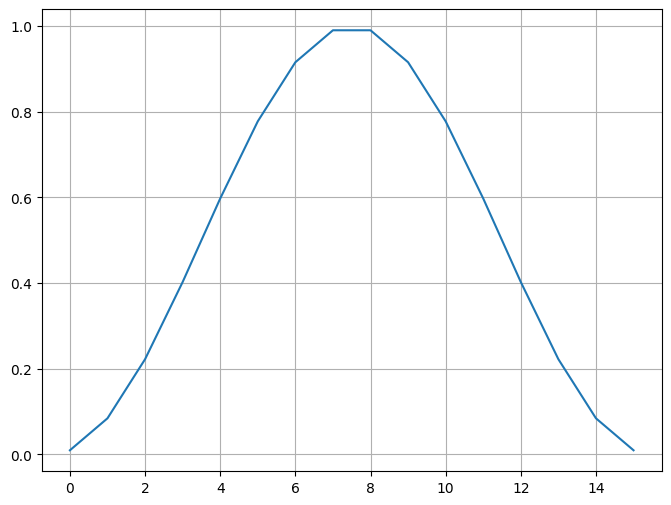

In [7]:
h = 0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(8,6))
plt.plot(h)
plt.grid()

Kode untuk menghasilkan dan memvisualisasikan koefisien dari filter FIR menggunakan metode window Hamming. Tujuan Windowing untuk mengontrol bagaimana sinyal masuk dipotong untuk mengurangi efek "leakage" dan "ringing" yang terjadi karena pemotongan abrupt (tiba-tiba).

* h = 0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5)): Baris ini menghitung koefisien filter menggunakan Hamming window. Di sini, np.arange(16) menghasilkan array dari 0 sampai 15, dan +0.5 adalah penyesuaian untuk menciptakan simetri yang lebih baik pada koefisien. 2*np.pi/16 adalah faktor normalisasi yang menyesuaikan dengan jumlah total titik (16), menghasilkan nilai yang dibutuhkan untuk fungsi kosinus. Fungsi cos kemudian diaplikasikan, dan hasilnya dikalikan dengan -0.5 dan ditambahkan ke 0.5 untuk menghasilkan window Hamming.

Window Hamming khususnya, memberikan trade-off yang baik antara lebar main lobe dan tingkat side lobes, yang bermanfaat untuk banyak aplikasi filter.
Aplikasi: Koefisien yang dihasilkan bisa digunakan untuk membuat filter low-pass, high-pass, band-pass, atau band-stop, tergantung pada bagaimana koefisien ini dikombinasikan dengan respon ideal lainnya dalam desain filter.

In [8]:
def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(8,6))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

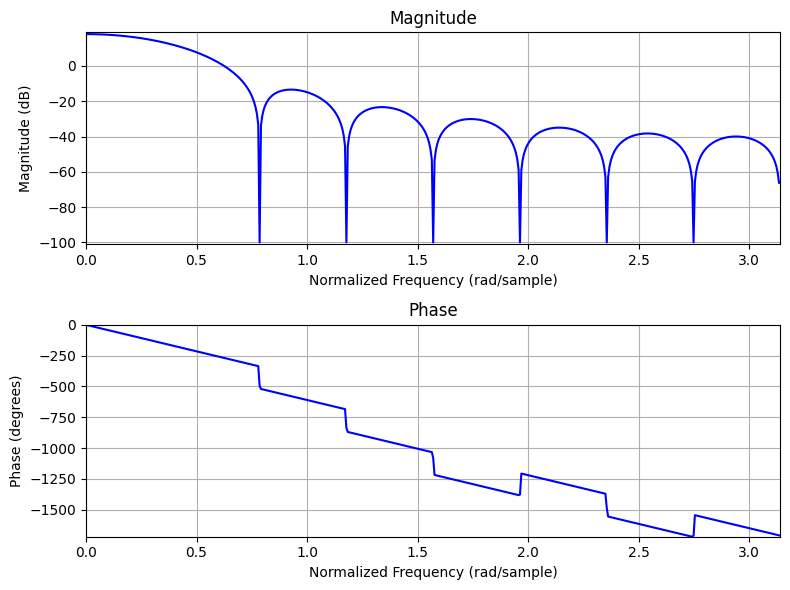

In [9]:
freqz(h)

Kode untuk menghitung dan menampilkan respon frekuensi dari filter FIR. Dari plot magnitude menampilkan respon frekuensi dalam dB terhadap frekuensi yang dinormalisasi (rad/sample). Plot dapat digunakan untuk melihat gain pada frekuensi tertentu dan penurunan pada frekuensi lainnya.Plot phase menampilkan respon frekuensi dalam derajat (radian) terhadap frekuensi yang dinormalisasi. Dapat diamati bagaimana phase sinyal masukan berubah sebagai akibat dari penerapan filter.

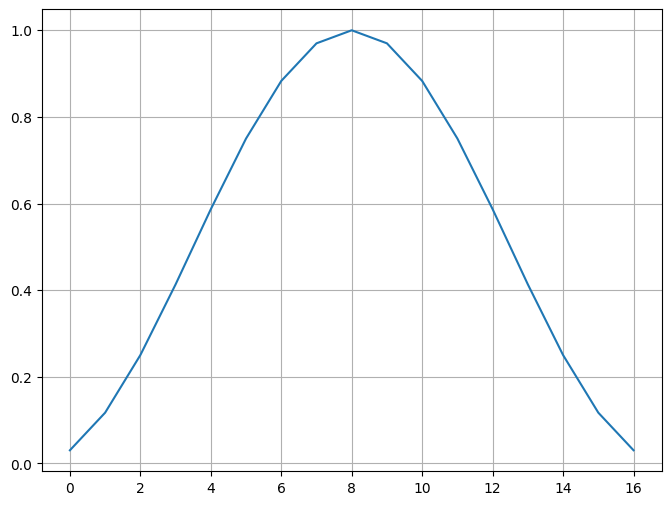

In [10]:
h = 0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(8,6))
plt.plot(h)
plt.grid()

Menghitung koefisien filter menggunakan fungsi window Hamming. Hasilnya array yang berisi angka dari 0 hingga 16 (total 17 angka) dengan sample cosinus sepanjang interval dari 0 hingga satu putaran.

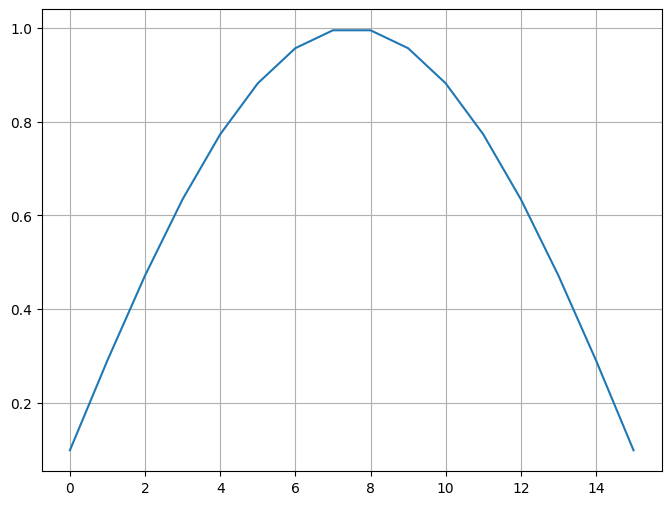

In [11]:
s = np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(8,6))
plt.plot(s)
plt.grid()

Menghitung nilai sinus dari sekumpulan titik dan kemudian di plot. Plot yang ditampilkan hasil dari sampel yang diambil pada interval yang telah ditentukan yakni dari 0 hingga 15.

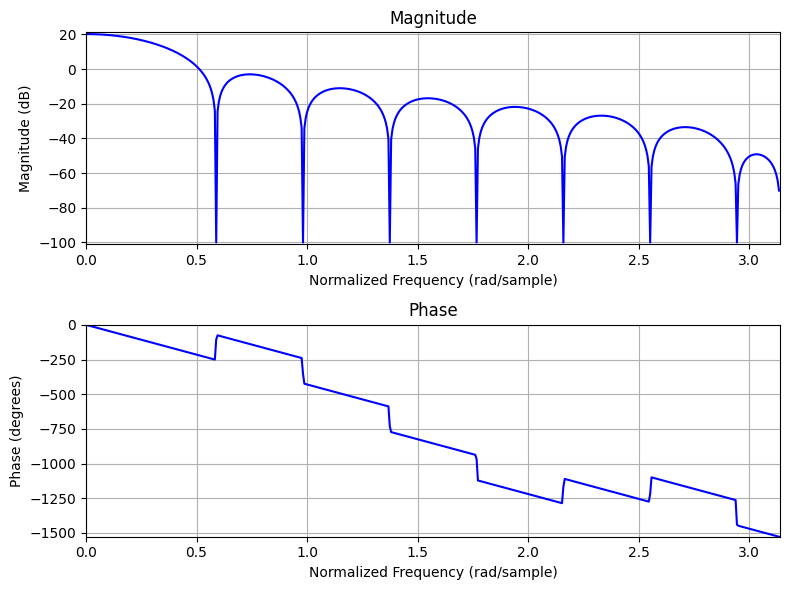

In [12]:
freqz(s)

Visualisasi (plot) dari respon dalam domain frekuensi. Pada magnitude plot menunjukkan magnitude dari respon frekuensi dalam decibel (dB). Karena "s" adalah sinusoid maka puncak di frekuensi akan sesuai dengan sinusoid yang dihasilkan. Plot fase akan menunjukkan bagaimana fase berubah sepanjang spektrum frekuensi. Untuk gelombang sinus murni, ini bisa jadi kurang informatif daripada saat menganalisis filter.

**Kaiser Window**

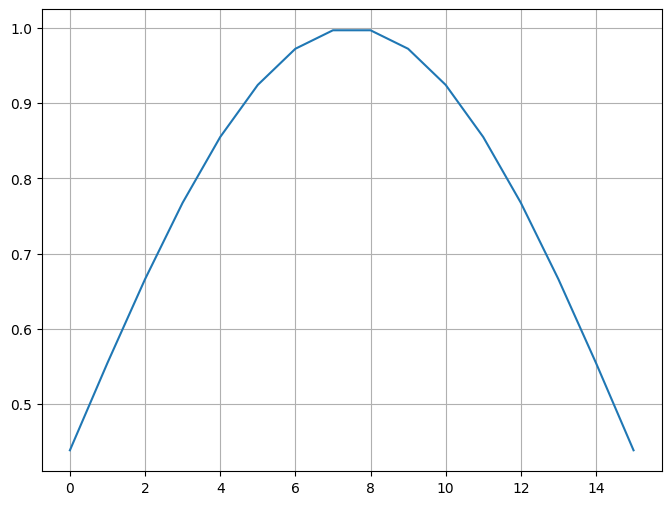

In [13]:
hk = np.kaiser(16,2)

plt.figure(figsize=(8,6))
plt.plot(hk)
plt.grid()

Kode untuk menghasilkan koefisien filter menggunakan window Kaiser yang menghasilkan 16 koefisien. Parameter kedua, "beta" mengontrol bentuk dari jendela. Nilai beta yang lebih tinggi memberikan lebar main lobe yang lebih lebar dan penurunan side lobe yang lebih tajam. Di sini, "beta" diset ke 2, yang memberikan keseimbangan antara lebar main lobe dan tingkat penurunan side lobe.

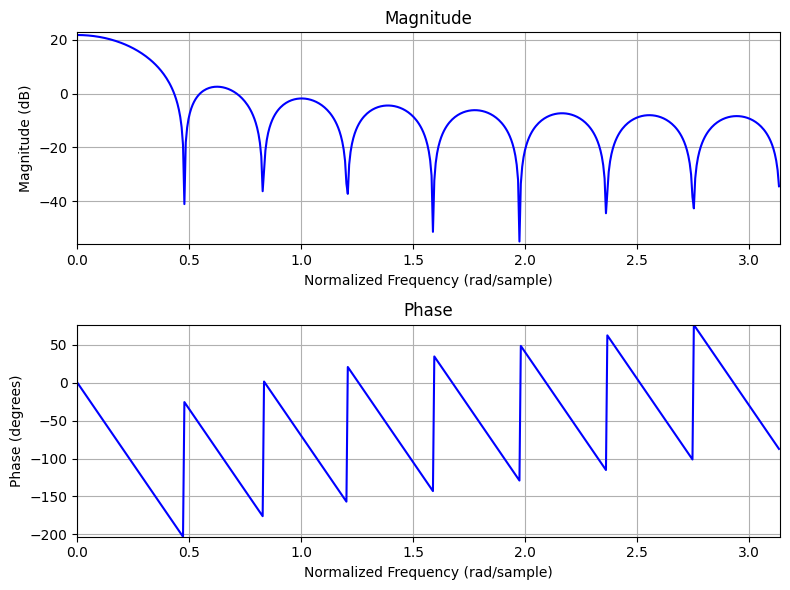

In [14]:
freqz(hk)

Plot respon frekuensi dari koefisien yang telah dihasilkan dengan window Kaiser. Frekuensi akan dinormalisasi dengan dibagi pi, sehingga berada dalam rentang 0 hingga 1(pi radian/sample). Karena menggunakan koefisien dari jendela Kaiser, magnitudo plot mungkin tidak menunjukkan karakteristik filter frekuensi spesifik (seperti low-pass atau high-pass). Namun, itu akan menunjukkan bagaimana amplitudo sinyal diubah oleh jendela itu sendiri melintasi spektrum. Plot fase akan menunjukkan perubahan fase yang diinduksi oleh koefisien jendela. Ini tidak akan menunjukkan linearitas seperti filter desain konvensional tapi akan memberikan wawasan tentang efek fase yang dihasilkan oleh aplikasi jendela tersebut.

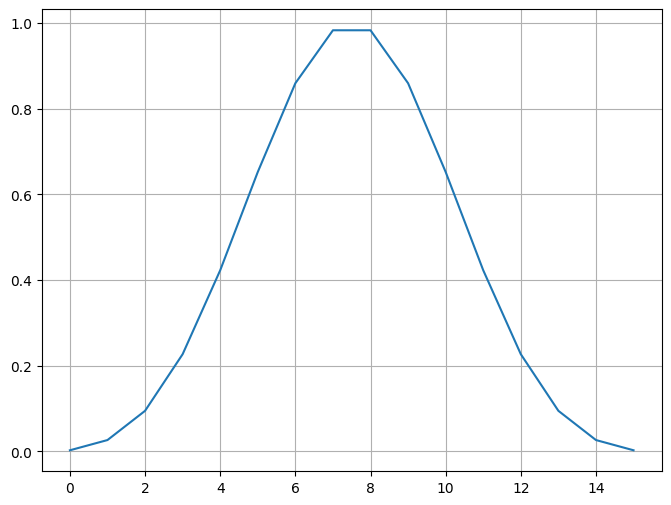

In [15]:
hk = np.kaiser(16,8)

plt.figure(figsize=(8,6))
plt.plot(hk)
plt.grid()

Kode untuk menghasilkan koefisien filter menggunakan window Kaiser yang menghasilkan 16 koefisien. Parameter kedua, "beta" mengontrol bentuk dari jendela. Nilai beta yang lebih tinggi memberikan lebar main lobe yang lebih lebar dan penurunan side lobe yang lebih tajam. Bahwa dengan beta yang lebih tinggi, transisi dari nilai tengah ke nol di tepi jendela akan lebih cepat, mengindikasikan side lobes yang lebih rendah.

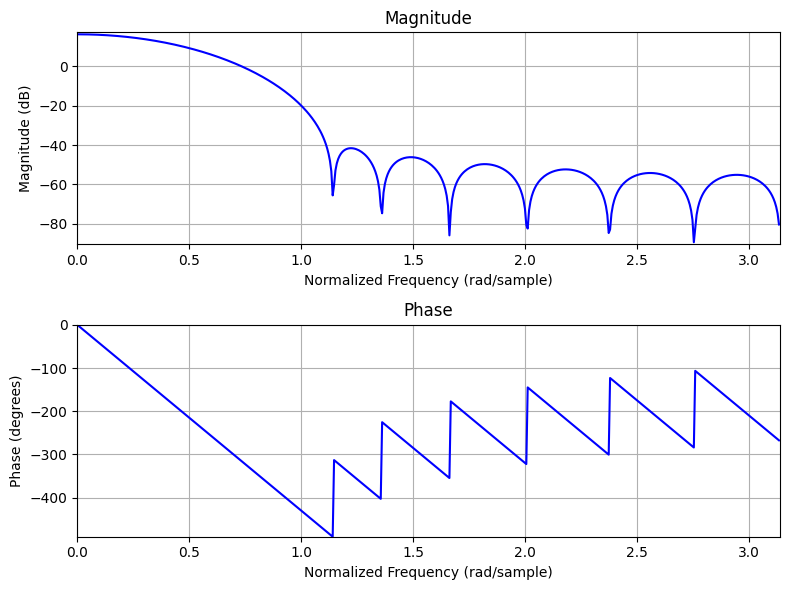

In [16]:
freqz(hk)

Plot magnitudo akan memberikan insight tentang karakteristik amplitudo frekuensi dari jendela Kaiser yang digunakan sebagai filter. Ini akan menampilkan puncak di beberapa titik, yang menggambarkan bagaimana energi disaring melalui jendela. Jendela Kaiser yang memiliki "beta" tinggi biasanya menunjukkan penurunan yang cepat setelah titik tertentu, mengindikasikan kemampuan filter dalam meredam frekuensi lebih tinggi. Plot fase akan memberikan gambaran tentang bagaimana fase berubah melalui frekuensi untuk koefisien hk. Karena ini adalah jendela (bukan filter yang dirancang dengan fase tertentu dalam pikiran), plot fase mungkin tidak menunjukkan pola linear atau spesifik yang diharapkan dari filter yang dirancang untuk aplikasi yang sensitif terhadap fase.